# AutoGluon

## Preparation

### Install AutoGluon

```bash
git clone ssh://git.amazon.com/pkg/AutoGluon
cd AutoGluon
python setup.py develop
```

### Import Task

We are using text classification as an example in this notebook.

In [1]:
from autogluon import text_classification as task

import logging
logging.basicConfig(level=logging.INFO)

## A Quick Text Classification Example

We first show the most basic usage by first creating a dataset and then fiting the dataset to generate the results with the text classification example. We will use Stanford Sentiment Treebank Dataset for this tutorial.

### Create AutoGluon Dataset

We use Stanford Sentiment Treebank - 2 (SST2) dataset.

In [2]:
dataset = task.Dataset(name='sst_2') # case insentive 
# TODO. show a quick summary of the dataset, e.g. #example for train, #classes

The constructed dataset contains the `gluon.data.DataLoader` for training and validation datasets.

Then we will use the default configuration of the text classification to generate:
* Best result of the search in terms of validation accuracy
* Get the best configuration corresponding to the best result obtained.
    
To acheive this, we are using `fit` function to generate the above results based on the datasets.

The default configruation is based on `max_trial_count=5` and `max_training_epochs=5`.

INFO:autogluon.scheduler.fifo:Starting Experiments
INFO:autogluon.scheduler.fifo:Num of Finished Tasks is 0
INFO:autogluon.scheduler.fifo:Num of Pending Tasks is 5
INFO:autogluon.scheduler.fifo:Adding A New Task Task(TASK_ID: 0) Task(fn=<function train_text_classification at 0x7f5f2df51c80>, args={'args': Namespace(data_name='sst_2', epochs=4, num_gpus=4, pretrained=True, train_path='/home/ubuntu/automodel/tutorials/data/train.json', val_path='/home/ubuntu/automodel/tutorials/data/test.json'), 'config': {'batch_size': 64, 'model': 'awd_lstm_lm_600', 'optimizer': 'sgd', 'dense_layers': 3, 'dropout': 0.2463208171138117, 'lr': 0.047013605353489696, 'momentum': 0.8502797339366056, 'pretrained': True}}, resources=Resources(nCPUs = 4, nGPUs = 4)))
INFO:autogluon.scheduler.fifo:Adding A New Task Task(TASK_ID: 1) Task(fn=<function train_text_classification at 0x7f5f2df51c80>, args={'args': Namespace(data_name='sst_2', epochs=4, num_gpus=4, pretrained=True, train_path='/home/ubuntu/automodel/tu

[Epoch 3] Begin, current learning rate: 0.0470
INFO:autogluon.estimator.event_handler:[Epoch 3] Begin, current learning rate: 0.0470
INFO:autogluon.scheduler.reporter:StatusReporter reporting: {"task_id": 0, "epoch": 4, "accuracy": 0.5392550143266476, "time_this_iter": 27.494879245758057}
[Epoch 3] Finished in 27.494s, train accuracy: 0.6419, train softmaxcrossentropyloss: 0.6366, validation accuracy: 0.5393, validation softmaxcrossentropyloss: 0.6658
INFO:autogluon.estimator.event_handler:[Epoch 3] Finished in 27.494s, train accuracy: 0.6419, train softmaxcrossentropyloss: 0.6366, validation accuracy: 0.5393, validation softmaxcrossentropyloss: 0.6658
Train finished using total 122s with 4 epochs. train accuracy: 0.6419, train softmaxcrossentropyloss: 0.6366, validation accuracy: 0.5393, validation softmaxcrossentropyloss: 0.6658
INFO:autogluon.estimator.event_handler:Train finished using total 122s with 4 epochs. train accuracy: 0.6419, train softmaxcrossentropyloss: 0.6366, validati

INFO:autogluon.task.text_classification.pipeline:Task ID : 3, args : Namespace(batch_size=32, data_name='sst_2', dense_layers=1, dropout=0.18564246558916925, epochs=4, lr=0.007985869408257396, model='awd_lstm_lm_1150', momentum=0.9194723466916177, num_gpus=4, optimizer='sgd', pretrained=False, train_path='/home/ubuntu/automodel/tutorials/data/train.json', val_path='/home/ubuntu/automodel/tutorials/data/test.json')
INFO:autogluon.searcher.searcher: INSIDE UPDATE METHOD 
INFO:autogluon.searcher.searcher:Finished Task with config: {"batch_size": 16, "model": "standard_lstm_lm_1500", "optimizer": "sgd", "dense_layers": 3, "dropout": 0.29339026585594496, "lr": 0.019515954577238186, "momentum": 0.889995020156713, "pretrained": true} and reward: 0.5415472779369628
INFO:autogluon.scheduler.reporter:StatusReporter reporting: {"task_id": 2, "epoch": 2, "accuracy": 0.9174785100286533, "time_this_iter": 381.6315231323242}
[Epoch 1] Finished in 381.613s, train accuracy: 0.8555, train softmaxcrossen

/home/ubuntu/automodel/autogluon/estimator/estimator.py:355: UserWarning: You are training with the following default event handlers: MetricHandler, ValidationHandler, LoggingHandler, DataLoaderHandler. They use loss and metrics from estimator.prepare_loss_and_metrics(). Please use the same set of metrics for all your other handlers.
  warnings.warn(msg)
Training begin: using optimizer FTML with current learning rate 0.0150 
INFO:autogluon.estimator.event_handler:Training begin: using optimizer FTML with current learning rate 0.0150 
Train for 4 epochs.
INFO:autogluon.estimator.event_handler:Train for 4 epochs.
[Epoch 0] Begin, current learning rate: 0.0150
INFO:autogluon.estimator.event_handler:[Epoch 0] Begin, current learning rate: 0.0150
INFO:autogluon.scheduler.reporter:StatusReporter reporting: {"task_id": 2, "epoch": 4, "accuracy": 0.9426934097421203, "time_this_iter": 425.7347855567932}
[Epoch 3] Finished in 425.735s, train accuracy: 0.8978, train softmaxcrossentropyloss: 0.240

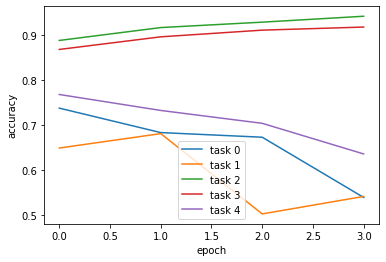

In [4]:
results = task.fit(dataset)

The best accuracy is:

In [5]:
print(results.metric)

0.9426934097421203


The associated best configuration is:

In [6]:
print(results.config)

{'batch_size': 8, 'model': 'standard_lstm_lm_650', 'optimizer': 'ftml', 'dense_layers': 2, 'dropout': 0.35362640673371476, 'lr': 0.001161410641902784, 'momentum': 0.8807446661297759, 'pretrained': True}


Total time cost is:

In [7]:
print('%.2f s' % results.time)

2835.40 s


## A Step-by-step Text Classification Example

We first introduce the basic configuration `autogluon.space`, which is used to represent the search space of each task components, we will then go throught each components, including 

* `autogluon.Dataset`
* `autogluon.Nets`
* `autogluon.Optimizers`
* `autogluon.Losses`
* `autogluon.Metrics`

and finally put all together to `fit` to generate best results.

### Import AutoGluon

In [3]:
import warnings
warnings.filterwarnings("ignore")

import autogluon as ag

### Create AutoGluon Space


`autogluon.space` is a search space containing a set of configuration candidates.
We provide three basic space types.

* Categorical Space

In [4]:
list_space = ag.space.List('listspace', ['0', '1', '2'])
print(list_space)

AutoGluon List Space listspace: ['0', '1', '2']


* Linear Space

In [5]:
linear_space = ag.space.Linear('linspace', 0, 10)
print(linear_space)

AutoGluon Linear Space linspace: lower 0, upper 10


* Log Space

In [6]:
log_space = ag.space.Log('logspace', 10**-10, 10**-1)
print(log_space)

AutoGluon Log Space logspace: lower 0.000000, upper 0.100000


* An Example of Random Sample from the Combined Space

In [7]:
print(ag.space.sample_configuration([list_space, linear_space, log_space]))

Configuration:
  linspace, Value: 9
  listspace, Value: '2'
  logspace, Value: 0.08100477968810121



We then will use `autogluon.Nets` and `autogluon.Optimizers` as examples to show the usage of auto objects. The remainining auto objects are using default value.

### Create AutoGluon Nets

`autogluon.Nets` is a list of auto networks, and allows search for the best net

* from a list of provided (or default) networks
* by choosing the best architecture regarding to each auto net.

In [8]:
nets = ag.Nets([
    task.get_model('standard_lstm_lm_200', **{'classification_layers': ag.space.Linear('dense', lower=1, upper=2)}),
    task.get_model('awd_lstm_lm_1150', **{'classification_layers': ag.space.Linear('dense', lower=1, upper=2)})
])

print(nets)

AutoGluon Nets ['standard_lstm_lm_200', 'awd_lstm_lm_1150'] with Configuration space object:
  Hyperparameters:
    dense_layers, Type: UniformInteger, Range: [1, 3], Default: 2
    dropout, Type: UniformFloat, Range: [0.0, 0.5], Default: 0.25
    model, Type: Categorical, Choices: {standard_lstm_lm_200, awd_lstm_lm_1150}, Default: standard_lstm_lm_200
    pretrained, Type: Categorical, Choices: {True, False}, Default: True
  Conditions:
    dense_layers | model in {'standard_lstm_lm_200', 'awd_lstm_lm_1150'}
    dropout | model in {'standard_lstm_lm_200', 'awd_lstm_lm_1150'}
    pretrained | model in {'standard_lstm_lm_200', 'awd_lstm_lm_1150'}



### Create AutoGluon Optimizers

`autogluon.Optimizers` defines a list of optimization algorithms that allows search for the best optimization algorithm 

* from a list of provided (or default) optimizers
* by choosing the best hyper-parameters regarding to each auto optimizer

In [9]:
optimizers = ag.Optimizers(['sgd', 'ftml'])

print(optimizers)

AutoGluon Optimizers ['sgd', 'ftml'] with Configuration space object:
  Hyperparameters:
    lr, Type: UniformFloat, Range: [0.0001, 0.1], Default: 0.0031622777, on log-scale
    momentum, Type: UniformFloat, Range: [0.85, 0.95], Default: 0.9
    optimizer, Type: Categorical, Choices: {sgd, ftml}, Default: sgd
  Conditions:
    lr | optimizer in {'sgd', 'ftml'}
    momentum | optimizer in {'sgd', 'ftml'}



### Create AutoGluon Fit - Put all together

INFO:autogluon.scheduler.fifo:Starting Experiments
INFO:autogluon.scheduler.fifo:Num of Finished Tasks is 0
INFO:autogluon.scheduler.fifo:Num of Pending Tasks is 2
INFO:autogluon.scheduler.fifo:Adding A New Task Task(TASK_ID: 0) Task(fn=<function train_text_classification at 0x7f3b03715c80>, args={'args': Namespace(data_name='sst_2', epochs=2, num_gpus=4, pretrained=True, train_path='/home/ubuntu/automodel/tutorials/data/train.json', val_path='/home/ubuntu/automodel/tutorials/data/test.json'), 'config': {'batch_size': 64, 'model': 'awd_lstm_lm_1150', 'optimizer': 'ftml', 'dense_layers': 1, 'dropout': 0.2595345363990322, 'lr': 0.0005865043124781794, 'momentum': 0.9212723496422937, 'pretrained': False}}, resources=Resources(nCPUs = 4, nGPUs = 4)))
INFO:autogluon.scheduler.fifo:Adding A New Task Task(TASK_ID: 1) Task(fn=<function train_text_classification at 0x7f3b03715c80>, args={'args': Namespace(data_name='sst_2', epochs=2, num_gpus=4, pretrained=True, train_path='/home/ubuntu/automode

INFO:autogluon.scheduler.fifo:Training History : OrderedDict([(0, [0.8544412607449857, 0.8653295128939829]), (1, [0.8813753581661891, 0.9277936962750717])])
INFO:autogluon.scheduler.fifo:Saving Training Curve in checkpoint/exp1_tc.png
INFO:autogluon.searcher.searcher: INSIDE GET_BEST_REWARD 
INFO:autogluon.searcher.searcher: INSIDE GET_BEST_CONFIG : RUN


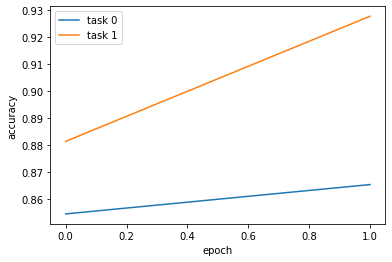

In [10]:
stop_criterion = {
    'time_limits': 1*60*60,
    'max_metric': 0.80,
    'max_trial_count': 2
}

resources_per_trial = {
    'max_num_gpus': 4,
    'max_num_cpus': 4,
    'max_training_epochs': 2
}

results = task.fit(dataset,
                   nets,
                   optimizers,
                   stop_criterion=stop_criterion,
                   resources_per_trial=resources_per_trial)

The best accuracy is:

In [12]:
print(results.metric)

0.9277936962750717


The best associated configuration is:

In [13]:
print(results.config)

{'batch_size': 32, 'model': 'awd_lstm_lm_1150', 'optimizer': 'sgd', 'dense_layers': 1, 'dropout': 0.3605075961335555, 'lr': 0.0007291030760438884, 'momentum': 0.9348128690260213, 'pretrained': True}


Total time cost is:

In [14]:
print('%.2f s' % results.time)

186.20 s


## Refereces

* code: https://code.amazon.com/packages/AutoGluon/trees/heads/mainline 
* API design: https://quip-amazon.com/aaGsAS9lY3WU/AutoGluon-API
* Implementation roadmap: https://quip-amazon.com/zlQUAjSWBc3c/AutoGluon-System-Implementation-Roadmap